In [1]:
from influxdb import InfluxDBClient
import matplotlib
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
import pandas as pd
import seaborn as sns
sns.set(style="white")

# avoiding type 3 fonts: http://phyletica.org/matplotlib-fonts/
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

client = InfluxDBClient(host='localhost', port=8086)
client.switch_database('rpkilog')

In [2]:
q_afrinic   = "SELECT DISTINCT(saddr) AS distinct_saddr FROM connect WHERE pp = 'afrinic' AND time >= '2020-04-30' AND time < '2020-05-01'"
q_apnic     = "SELECT DISTINCT(saddr) AS distinct_saddr FROM connect WHERE pp = 'apnic' AND time >= '2020-04-30' AND time < '2020-05-01'"
q_ca_rg_net = "SELECT DISTINCT(saddr) As distinct_saddr FROM connect WHERE pp = 'ca.rg.net' AND time >= '2020-04-30' AND time < '2020-05-01'"

df_afrinic   = pd.DataFrame(client.query(q_afrinic).get_points())
df_apnic     = pd.DataFrame(client.query(q_apnic).get_points())
df_ca_rg_net = pd.DataFrame(client.query(q_ca_rg_net).get_points())

afrinic_set   = set(df_afrinic.distinct_saddr)
apnic_set     = set(df_apnic.distinct_saddr)
ca_rg_net_set = set(df_ca_rg_net.distinct_saddr)

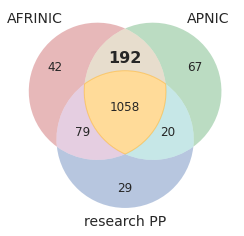

In [3]:
v = venn3_unweighted( [afrinic_set, apnic_set, ca_rg_net_set], ('AFRINIC', 'APNIC', 'research PP'))
v.get_patch_by_id('111').set_color('orange')

for text in v.set_labels:
    text.set_fontsize(14)
for text in v.subset_labels:
    text.set_fontsize(12)
    
# bring attention to the intersection of AFRINIC and APNIC
rir_intersection = v.subset_labels[2]
rir_intersection.set_fontsize(16)
rir_intersection.set_fontweight('bold')

plt.savefig("imc20/venn-20200430.pdf", bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()